# SMS Spam Collection Data Set

#### Importing Relevant libraries

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , confusion_matrix

In [153]:
#nltk.download_shell() 
## Download stopwords package .

In [154]:
# Data set link -- https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

#### Importing the dataset

In [155]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [156]:
len(messages)

5574

In [157]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [158]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [159]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [160]:
# Seperating the with '\t' 
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [161]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [163]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [164]:
# Checking the lenght of every message 
messages['length'] = messages['message'].apply(len)

In [165]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


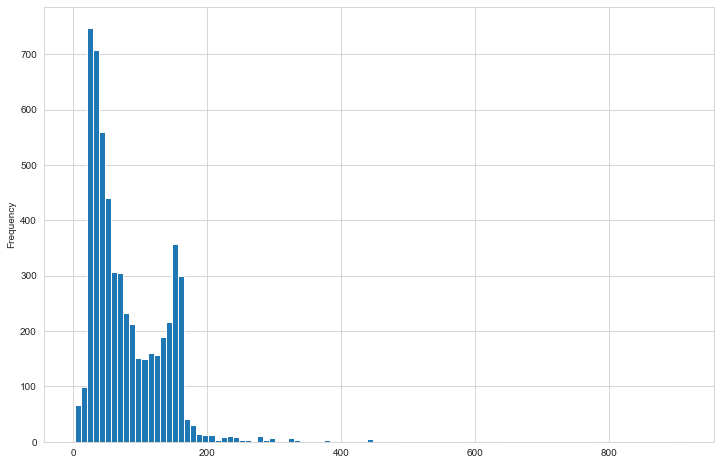

In [166]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
messages['length'].plot.hist(bins=100);

In [167]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [168]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

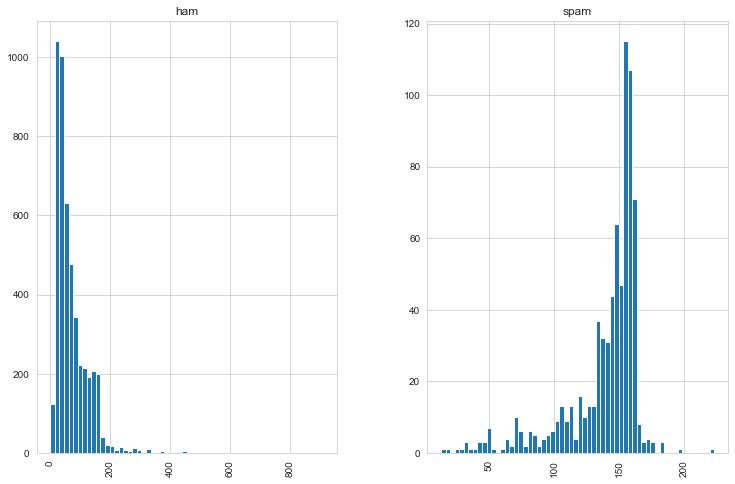

In [169]:
messages.hist(column='length',by='label',bins=60,figsize=(12,8));

In [170]:
# Removing all the punctiation from the dataset

In [171]:
# Sample 
mess = 'Sample message ! Notice: it has punctuation'
nopunc = [c for c in mess if not c in string.punctuation]
nopunc = ''.join(nopunc)
print('Normal message :',nopunc)
print('Splitted message :',nopunc.split())

Normal message : Sample message  Notice it has punctuation
Splitted message : ['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']


In [172]:
# Removing stop words from the data set 
# Stop words : https://towardsdatascience.com/stop-words-in-nlp-5b248dadad47
#stopwords.words('english')

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [173]:
# Creating function to remove punc. and stop words from actual dataset 
def text_process(mess):
    '''
    1. Remove Puncuations
    2. Remove stop words
    3. Return List of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [174]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [177]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [178]:
print(len(bow_transformer.vocabulary_))

11425


In [183]:
# Trying bow transformation on a simgle message
mess4 = messages['message'][3]
print('Message: ',mess4)
bow4 = bow_transformer.transform([mess4])
print(bow4)
print('Shape:  ',bow4.shape)

Message:  U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
Shape:   (1, 11425)


In [188]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [185]:
# Performing bow transformation on the entire dataset 
messages_bow = bow_transformer.transform(messages['message'])

In [190]:
print('Shape of sparsh Matrix: ',messages_bow.shape)
# Non Zero Occurances
print('Amount of Non-Zero Occurances: ',messages_bow.nnz)

Shape of sparsh Matrix:  (5572, 11425)
Amount of Non-Zero Occurances:  50548


In [191]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [197]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [198]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

8.527076498901426
3.2800524267409408


In [200]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


#### Training a model

In [114]:
# Using MultinominalNB from sklearn.naive_bayes
spam_detection_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [201]:
print('Predicted category: ',spam_detection_model.predict(tfidf4)[0])
print('Actual category: ',messages['label'][3])

Predicted category:  ham
Actual category:  ham


#### Model Evaluation

In [202]:
all_pred = spam_detection_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [209]:
# Performing train test split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [210]:
# Create pipline for all the steps performed earlier
# Evaluating with Naive Bayes

pipline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [211]:
pipline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001A9456E2950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [212]:
pred = pipline.predict(msg_test)

In [213]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1445
        spam       1.00      0.71      0.83       227

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [214]:
# Evaluating with RandomForestClassifier

In [215]:
pipline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [216]:
pipline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001A9456E2950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [217]:
pred = pipline.predict(msg_test)

In [218]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1445
        spam       1.00      0.80      0.89       227

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [221]:
print(confusion_matrix(label_test,pred))

[[1445    0]
 [  46  181]]
